In [52]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
import operator

In [53]:
class Quadratic(TypedDict):
    a: int
    b: int
    c: int
    D: float
    equation: str
    roots: str

In [54]:
def show_eq(state: Quadratic) -> dict:
    a, b, c = state["a"], state["b"], state["c"]
    eq = f"{a}x² {'+' if b>=0 else ''}{b}x {'+' if c>=0 else ''}{c}"
    return {"equation": eq}

def calc_D(state: Quadratic) -> dict:
    d = (state["b"] ** 2) - (4 * state["a"] * state["c"])
    return {"D": d}

In [59]:
def reyal(state: Quadratic) -> dict:
    root1 = (-state['b'] + (state['D'] ** 0.5)) / (2 * state['a'])
    root2 = (-state['b'] - (state['D'] ** 0.5)) / (2 * state['a'])
    result = f"the roots are {root1:.3f} and {root2:.3f} and are distinct and real"
    return {"roots": result}

def single_reyal(state: Quadratic) -> dict:
    root = -state['b'] / (2 * state['a'])
    result = f"the root is {root:.3f} and is single and real"
    return {"roots": result}

def imaginary(state: Quadratic) -> dict:
    real = -state['b'] / (2 * state['a'])
    imag = (abs(state['D']) ** 0.5) / (2 * state['a'])
    result = f"the roots are {real:.3f}+{imag:.3f}i and {real:.3f}-{imag:.3f}i and are imaginary"
    return {"roots": result}


# function for condition for graph conditional roots and decide where to route 
def checker(state: Quadratic)-> Literal["reyal","single_reyal","imaginary"]:
    if state['D']>0:
        return "reyal"
    elif state['D'] == 0:
        return "single_reyal"
    else:
        return "imaginary"


In [56]:
graph=StateGraph(Quadratic)
# nodes
graph.add_node('show_eq',show_eq)
graph.add_node('calc_D',calc_D)
graph.add_node('reyal',reyal)
graph.add_node('single_reyal',single_reyal)
graph.add_node('imaginary',imaginary)


# Edges 
graph.add_edge(START,'show_eq')
graph.add_edge('show_eq','calc_D')
#conditional edge            from where , to where
graph.add_conditional_edges("calc_D", checker, {
    "reyal": "reyal",
    "single_reyal": "single_reyal",
    "imaginary": "imaginary"
})
graph.add_edge('reyal',END)
graph.add_edge('single_reyal',END)
graph.add_edge('imaginary',END)

wf=graph.compile()


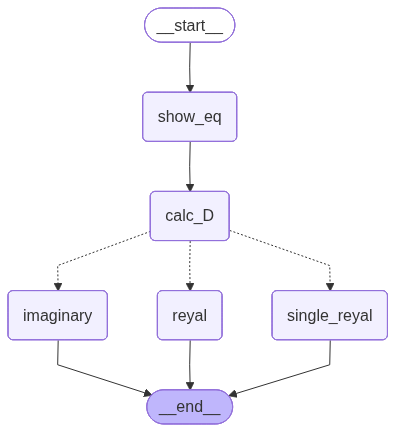

In [57]:
wf

In [58]:
I={
    'a':2,
    'b':4,
    'c':2
}
wf.invoke(I)

{'a': 2,
 'b': 4,
 'c': 2,
 'D': 0,
 'equation': '2x² +4x +2',
 'roots': 'the root is -1.000 and is single reyal'}